In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import pingouin as pg
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


In [17]:
def get_data_dir(data_name : str) :
    curr_dir = os.getcwd()
    data_dir = curr_dir + "/" + data_name

    return data_dir

def get_data_dict( data_name ) :
    data_dir = get_data_dir(data_name)
    parti_list = os.listdir(data_dir)
    parti_list = [ x for x in parti_list if not x.startswith(".")]
    parti_dict = { x.split(sep='.')[0] : np.load(data_dir + "/" + x) if x.endswith(".npy") \
                  else pd.read_csv(data_dir + "/" + x, index_col=0 ).values for x in parti_list}

    return parti_dict

def dict_sort( data_dict ) : 
    sorted_dict = dict(sorted(data_dict.items()))

    return sorted_dict

def key_str2int( data_dict ) : 
    data_dict = { int(key.split(sep='_')[0]) : value for key, value in data_dict.items() }

    return data_dict
    

def get_data_arr( data_dict ) :
    data_dict = dict_sort(data_dict)
    arr = [ value for key, value in data_dict.items() ]

    arr = np.array(arr)

    return arr

def correlation_analysis( data1, data2, method='pearson', level= 0.05) :
    df = pg.corr(data1,data2, method=method) 
    r, p = df['r'].values, df['p-val'].values
    if p <= level and r >= 0.4 :
        print( f" r = {r}, p = {p}")
    #else : print("Not Significant")




In [3]:
ssq_dict = get_data_dict('SSQ')
rating_dict = get_data_dict('Dynamic_rating')
dense_dict = get_data_dict('Dense')
v_dict = get_data_dict('HSV')
feature_dict = get_data_dict('Feature')

In [4]:
print(dense_dict.keys())
print(v_dict.keys())
print(feature_dict.keys())

dense_dict = key_str2int(dense_dict)
v_dict = key_str2int(v_dict)
feature_dict = key_str2int(feature_dict)

print(dense_dict.keys())
print(v_dict.keys())
print(feature_dict.keys())

dict_keys(['10_flows', '11_flows', '12_flows', '13_flows', '14_flows', '15_flows', '16_flows', '17_flows', '18_flows', '19_flows', '1_flows', '20_flows', '2_flows', '3_flows', '4_flows', '5_flows', '6_flows', '7_flows', '8_flows', '9_flows'])
dict_keys(['10_v_values', '11_v_values', '12_v_values', '13_v_values', '14_v_values', '15_v_values', '16_v_values', '17_v_values', '18_v_values', '19_v_values', '1_v_values', '20_v_values', '2_v_values', '3_v_values', '4_v_values', '5_v_values', '6_v_values', '7_v_values', '8_v_values', '9_v_values'])
dict_keys(['10_feature', '11_feature', '12_feature', '13_feature', '14_feature', '15_feature', '16_feature', '17_feature', '18_feature', '19_feature', '1_feature', '20_feature', '2_feature', '3_feature', '4_feature', '5_feature', '6_feature', '7_feature', '8_feature', '9_feature'])
dict_keys([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 2, 3, 4, 5, 6, 7, 8, 9])
dict_keys([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 2, 3, 4, 5, 6, 7, 8, 9])
dict_

In [5]:
for key, value in feature_dict.items() : 
    feature_dict[key] = value[:3600]

In [6]:
print(ssq_dict[iter(ssq_dict).__next__()].shape)
print(rating_dict[iter(rating_dict).__next__()].shape)
print(dense_dict[iter(dense_dict).__next__()].shape)
print(v_dict[iter(v_dict).__next__()].shape)
print(feature_dict[iter(feature_dict).__next__()].shape)


(30, 5)
(7150, 20)
(3600, 256, 256)
(3600, 256, 256)
(3600,)


In [7]:
rating_arr = get_data_arr(rating_dict)
dense_arr = get_data_arr(dense_dict)
v_arr = get_data_arr(v_dict)
feature_arr = get_data_arr(feature_dict)

In [8]:
print(rating_arr.shape)
print(dense_arr.shape)
print(v_arr.shape)
print(feature_arr.shape)

(30, 7150, 20)
(20, 3600, 256, 256)
(20, 3600, 256, 256)
(20, 3600)


In [9]:
# Dense_arr 데이터에 inf 값이 존재 -> 제거
dense_arr[np.isinf(dense_arr)] = 0 
print (np.isinf(dense_arr).any())

False


In [10]:
ssq_dict["Feeling heavy in the head"].shape

(30, 5)

In [11]:
# Rating Normality Test
pg.normality( rating_arr.mean(axis=(0)).flatten())

,W,pval,normal
0,0.908167,0.0,False


In [12]:
# SSQ Normality Test 
for key, value in ssq_dict.items() :
    arr = value.flatten()
    df = pg.normality(arr)

    print(key, "//",df['normal'][0])
    # if df['normal'].values == True:
    #     print(key,df['pval'])

Feeling heavy in the head // False
Vertigo // False
Stiff shoulder // False
Difficulty focussing // False
Vomiiting // False
Nausea // False
Eyestrain // False
Near vision difficulty // False
Warm Eyes // False
Hazy // False
Gritty // False
Watery Eyes // False
Bleary // False
Sleepy // False
Heavy Eyes // False
Sting // False
Dry Eyed // False
Far vision difficulty // False
Difficulty concentrating // False
Pain in the middle of the head // False
Stiff neck // False
Eye-Ache // False
Feel heavy // False
Pain in the temple // False
Pain in the back of the head // False
Double vision // False
Dizzy // False
Flickering // False


In [13]:
#  Rating & Dense OF Correlation
pg.corr(rating_arr.mean(axis=(0,1)),dense_arr.mean(axis=(1,2,3)), method='spearman')

,n,r,CI95%,p-val,power
spearman,20,0.897744,"[0.76, 0.96]",7.968058e-08,0.999984


In [14]:
#  Rating & Feature OF Correlation
pg.corr(rating_arr.mean(axis=(0,1)),feature_arr.mean(axis=1), method='spearman')

,n,r,CI95%,p-val,power
spearman,20,0.876692,"[0.71, 0.95]",3.967924e-07,0.999909


In [15]:
# Rating & V-value Correlation
pg.corr(rating_arr.mean(axis=(0,1)),v_arr.mean(axis=(1,2,3)), method='spearman')

,n,r,CI95%,p-val,power
spearman,20,0.506767,"[0.08, 0.78]",0.022588,0.652059


In [18]:
rating_data = rating_arr.reshape(rating_arr.shape[0], rating_arr.shape[1], 4,5 ).mean(axis=(1,3))

for key, value in ssq_dict.items():
    print(key)
    #print(value.shape)
    correlation_analysis(rating_data.flatten(), ssq_dict[key][:,1:].flatten(), method='spearman' )
    print('-'*50)

Feeling heavy in the head
--------------------------------------------------
Vertigo
--------------------------------------------------
Stiff shoulder
--------------------------------------------------
Difficulty focussing
 r = [0.46623582], p = [8.0154668e-08]
--------------------------------------------------
Vomiiting
--------------------------------------------------
Nausea
--------------------------------------------------
Eyestrain
 r = [0.51396799], p = [1.92616045e-09]
--------------------------------------------------
Near vision difficulty
--------------------------------------------------
Warm Eyes
--------------------------------------------------
Hazy
--------------------------------------------------
Gritty
--------------------------------------------------
Watery Eyes
--------------------------------------------------
Bleary
--------------------------------------------------
Sleepy
--------------------------------------------------
Heavy Eyes
 r = [0.42254727], p = [1.52

: 

In [ ]:
feature_datat = feature_arr.mean(axis=1).reshape(4,5).mean(axis=1)
v_data = v_arr.mean(axis=(1,2,3)).reshape(4,5).mean(axis=1)

In [ ]:
feature_se = [ np.std(feature_arr.mean(axis=1)[x:x+5]) / np.sqrt(5) for x in range(0,20,5) ]
v_se = [ np.std(v_arr.mean(axis=(1,2,3))[x:x+5]) / np.sqrt(5) for x in range(0,20,5) ]


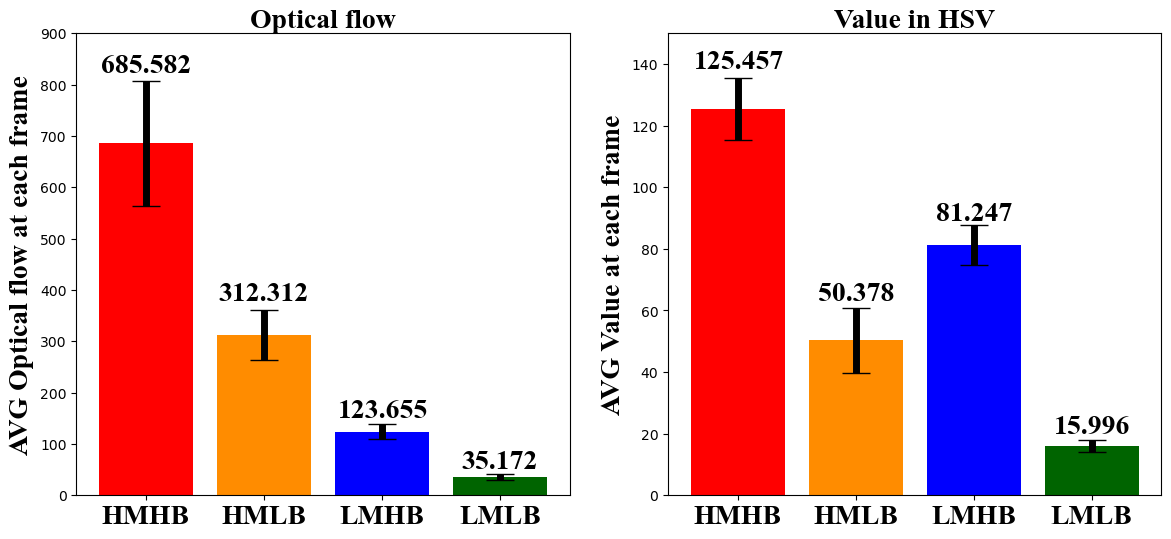

In [ ]:
colors = [ 'r', 'darkorange', 'b','darkgreen']
font_dict = {'family': 'Times New Roman',
      'color':  'black',
      'weight': 'bold',
      'size': 20,
      'va' : 'center',
      'ha' : 'center' }

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

axs[0].bar(range(4), feature_datat, color= colors)
axs[0].set_title("Optical flow", fontdict=font_dict)
axs[0].set_xticks(range(4), ["HMHB", "HMLB", "LMHB","LMLB"], family = 'Times New Roman', size = 20, weight = 'bold');
axs[0].set_ylim(0,900)
axs[0].set_ylabel('AVG Optical flow at each frame', family = 'Times New Roman', size = 20, weight = 'bold');
axs[0].errorbar(range(4), feature_datat, feature_se,linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 

axs[1].bar(range(4), v_data, color=colors)
axs[1].set_title("Value in HSV", fontdict=font_dict)
axs[1].set_xticks(range(4), ["HMHB", "HMLB", "LMHB","LMLB"], family = 'Times New Roman', size = 20, weight = 'bold');
axs[1].set_ylim(0,150)
axs[1].set_ylabel('AVG Value at each frame', family = 'Times New Roman', size = 20, weight = 'bold');
axs[1].errorbar(range(4), v_data, v_se, linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 


y1 = [150, 80, 40,30]
y2= [15,15,10,6]
for i, blc in enumerate(feature_datat): 
    axs[0].text(x = i, y=feature_datat[i] + y1[i] , s= round(blc, 3), fontdict=font_dict)
for i, blc in enumerate(v_data): 
    axs[1].text(x = i, y= v_data[i] + y2[i]  , s= round(blc, 3), fontdict=font_dict)